In [1]:
cd /Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar


/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar


In [2]:
ls

GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v2.jpeg
LICENSE
README.rst
Simba_GalaxySize_Hist1D.jpeg
Simba_GalaxySize_Hist1D_nonlog.jpeg
Simba_GalaxyStellarMass_Hist1D.jpeg
Simba_GalaxyStellarMass_Hist1D_nonlog.jpeg
Simba_GalaxyStellarMass_vs_Size_Hist2D_v1.jpeg
Simba_GalaxyStellarMass_vs_Size_v1.jpeg
build/
caesar/
caesar.egg-info/
dist/
docs/
readthedocs.yml
scripts/
setup.py
tests/


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import SubplotSpec
from scipy import stats

import yt
import caesar as caesar

In [5]:
#snapnum,snapz=caesar.progen.z_to_snap(redshift=0)
# load in input file
obj = caesar.load('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5')

yt : [INFO     ] 2021-10-26 14:57:24,644 Opening /Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5
yt : [INFO     ] 2021-10-26 14:57:24,748 Found 464043 halos
yt : [INFO     ] 2021-10-26 14:57:24,776 Found 55609 galaxies


In [6]:
snapnum,snapz=caesar.progen.z_to_snap(redshift=0)

In [7]:
snapnum

151

In [8]:
snapz

0.0

In [9]:
obj.galaxies

In [10]:
len(obj.galaxies)

55609

In [175]:
def read_caesar(caesarfilename):
    groups=caesar.load(caesarfilename)
    Ngal=len(groups.galaxies)
    idx=np.zeros(Ngal);cent=np.zeros(Ngal);sfr=np.zeros(Ngal);rdisk=np.zeros(Ngal)
    mHI=np.zeros(Ngal);mH2=np.zeros(Ngal);Mstar=np.zeros(Ngal);Mhalo=np.zeros(Ngal); Shalo=np.zeros(Ngal)
    
    for i,galaxy in enumerate(groups.galaxies):
        idx[i] = galaxy.GroupID
        cent[i] = (galaxy.central).astype(int)
        sfr[i] = galaxy.sfr
        rdisk[i]=galaxy.radii['stellar_half_mass']
        Mstar[i] = galaxy.masses['stellar']
        mHI[i] = galaxy.masses['HI']
        mH2[i] = galaxy.masses['H2'] 
        Mhalo[i]=galaxy.halo.masses['total']
        Shalo[i]=galaxy.halo.virial_quantities['spin_param']
    
    df=pd.DataFrame({'GID':idx,'central':cent,'galaxy_mass':Mstar,'galaxy_size':rdisk, 'SFR':sfr,'mHI':mHI,'mH2':mH2,
        'Mhalo':Mhalo, 'Shalo' : Shalo})
    
    return df

In [77]:
df_SIMBA = read_caesar('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5')

yt : [INFO     ] 2021-10-26 16:44:47,352 Opening /Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5
yt : [INFO     ] 2021-10-26 16:44:47,447 Found 464043 halos
yt : [INFO     ] 2021-10-26 16:44:47,495 Found 55609 galaxies


In [78]:
df_SIMBA

,GID,central,galaxy_mass,galaxy_size,SFR,mHI,mH2,Mhalo
0,0.0,1.0,4.464625e+12,25.092316,0.000000,1.416904e+10,1.109349e+09,1.060091e+15
1,1.0,1.0,4.116048e+12,11.327452,32.495613,4.860084e+09,2.554619e+10,4.434884e+14
2,2.0,1.0,1.952101e+12,14.278415,0.000000,4.645089e+09,2.795169e+08,6.903581e+14
3,3.0,1.0,1.529247e+12,15.543864,0.021102,5.732368e+09,4.867583e+08,5.379628e+14
4,4.0,1.0,1.433810e+12,16.883629,0.000000,2.346815e+09,2.084681e+08,1.409975e+14
...,...,...,...,...,...,...,...,...
55604,55604.0,0.0,2.613188e+08,4.515059,0.000000,1.703623e+00,0.000000e+00,1.087991e+14
55605,55605.0,0.0,2.611491e+08,3.707688,0.000000,3.065291e-02,0.000000e+00,6.404380e+14
55606,55606.0,0.0,2.610782e+08,3.546892,0.000000,1.451338e-01,0.000000e+00,6.903581e+14
55607,55607.0,0.0,2.610179e+08,2.542438,0.000000,0.000000e+00,0.000000e+00,6.929859e+13


In [79]:
df_SIMBA['central'].value_counts()

1.0    35843
0.0    19766
Name: central, dtype: int64

In [80]:
# add a column that labels galaxy type
df_SIMBA['galaxy_type'] = df_SIMBA.apply(lambda row: 'central' if row['central']==True else 'satellite', axis=1)

In [81]:
df_SIMBA

,GID,central,galaxy_mass,galaxy_size,SFR,mHI,mH2,Mhalo,galaxy_type
0,0.0,1.0,4.464625e+12,25.092316,0.000000,1.416904e+10,1.109349e+09,1.060091e+15,central
1,1.0,1.0,4.116048e+12,11.327452,32.495613,4.860084e+09,2.554619e+10,4.434884e+14,central
2,2.0,1.0,1.952101e+12,14.278415,0.000000,4.645089e+09,2.795169e+08,6.903581e+14,central
3,3.0,1.0,1.529247e+12,15.543864,0.021102,5.732368e+09,4.867583e+08,5.379628e+14,central
4,4.0,1.0,1.433810e+12,16.883629,0.000000,2.346815e+09,2.084681e+08,1.409975e+14,central
...,...,...,...,...,...,...,...,...,...
55604,55604.0,0.0,2.613188e+08,4.515059,0.000000,1.703623e+00,0.000000e+00,1.087991e+14,satellite
55605,55605.0,0.0,2.611491e+08,3.707688,0.000000,3.065291e-02,0.000000e+00,6.404380e+14,satellite
55606,55606.0,0.0,2.610782e+08,3.546892,0.000000,1.451338e-01,0.000000e+00,6.903581e+14,satellite
55607,55607.0,0.0,2.610179e+08,2.542438,0.000000,0.000000e+00,0.000000e+00,6.929859e+13,satellite


In [82]:
df_SIMBA['galaxy_type'].value_counts()

central      35843
satellite    19766
Name: galaxy_type, dtype: int64

### Logarithmic scale of size & mass

In [83]:
def log_func(df):
    '''
    Converts to log10 non-zero size and mass entries (without distinguishing galaxy type)
    output: df with new columns of log mass, log size added to it

    '''
    #first let's remove all galaxy_mass=0 since you are going to at the end anyway
    df=df[df['galaxy_mass'] > 0]

#     #subhalo_flag = subhalos[‘SubhaloFlag’]
#     if type_of_galaxy == 'central':
#         df=df[df['subhalo_flag']==True]
#     elif type_of_galaxy == 'satellite':
#         df=df[df['subhalo_flag']==False]
#     else: 
#         print("type_of_galaxy must be set to central or satellite")

    #since we got rid of all zero mass we can just take the log10
    df['galaxy_mass_log']=np.log10(df['galaxy_mass'])
    df['galaxy_size_log']=np.log10(df['galaxy_size'])

    return df

In [84]:
df_SIMBA_log=log_func(df_SIMBA)

In [85]:
df_SIMBA_log

,GID,central,galaxy_mass,galaxy_size,SFR,mHI,mH2,Mhalo,galaxy_type,galaxy_mass_log,galaxy_size_log
0,0.0,1.0,4.464625e+12,25.092316,0.000000,1.416904e+10,1.109349e+09,1.060091e+15,central,12.649785,1.399541
1,1.0,1.0,4.116048e+12,11.327452,32.495613,4.860084e+09,2.554619e+10,4.434884e+14,central,12.614480,1.054132
2,2.0,1.0,1.952101e+12,14.278415,0.000000,4.645089e+09,2.795169e+08,6.903581e+14,central,12.290502,1.154680
3,3.0,1.0,1.529247e+12,15.543864,0.021102,5.732368e+09,4.867583e+08,5.379628e+14,central,12.184478,1.191559
4,4.0,1.0,1.433810e+12,16.883629,0.000000,2.346815e+09,2.084681e+08,1.409975e+14,central,12.156492,1.227466
...,...,...,...,...,...,...,...,...,...,...,...
55604,55604.0,0.0,2.613188e+08,4.515059,0.000000,1.703623e+00,0.000000e+00,1.087991e+14,satellite,8.417171,0.654663
55605,55605.0,0.0,2.611491e+08,3.707688,0.000000,3.065291e-02,0.000000e+00,6.404380e+14,satellite,8.416889,0.569103
55606,55606.0,0.0,2.610782e+08,3.546892,0.000000,1.451338e-01,0.000000e+00,6.903581e+14,satellite,8.416771,0.549848
55607,55607.0,0.0,2.610179e+08,2.542438,0.000000,0.000000e+00,0.000000e+00,6.929859e+13,satellite,8.416670,0.405250


In [86]:
np.count_nonzero(df_SIMBA_log['galaxy_size_log']) # this means that there are no mass zero entries in Simba

55609

In [87]:
df_SIMBA_mass_filtered = df_SIMBA_log.loc[(df_SIMBA_log.galaxy_mass_log>=8) , :] # choose only galaxies that have a mass of logMstar>8

In [88]:
df_SIMBA_mass_filtered # Wow! All galaxy masses in Simba are logMstar>8 !

,GID,central,galaxy_mass,galaxy_size,SFR,mHI,mH2,Mhalo,galaxy_type,galaxy_mass_log,galaxy_size_log
0,0.0,1.0,4.464625e+12,25.092316,0.000000,1.416904e+10,1.109349e+09,1.060091e+15,central,12.649785,1.399541
1,1.0,1.0,4.116048e+12,11.327452,32.495613,4.860084e+09,2.554619e+10,4.434884e+14,central,12.614480,1.054132
2,2.0,1.0,1.952101e+12,14.278415,0.000000,4.645089e+09,2.795169e+08,6.903581e+14,central,12.290502,1.154680
3,3.0,1.0,1.529247e+12,15.543864,0.021102,5.732368e+09,4.867583e+08,5.379628e+14,central,12.184478,1.191559
4,4.0,1.0,1.433810e+12,16.883629,0.000000,2.346815e+09,2.084681e+08,1.409975e+14,central,12.156492,1.227466
...,...,...,...,...,...,...,...,...,...,...,...
55604,55604.0,0.0,2.613188e+08,4.515059,0.000000,1.703623e+00,0.000000e+00,1.087991e+14,satellite,8.417171,0.654663
55605,55605.0,0.0,2.611491e+08,3.707688,0.000000,3.065291e-02,0.000000e+00,6.404380e+14,satellite,8.416889,0.569103
55606,55606.0,0.0,2.610782e+08,3.546892,0.000000,1.451338e-01,0.000000e+00,6.903581e+14,satellite,8.416771,0.549848
55607,55607.0,0.0,2.610179e+08,2.542438,0.000000,0.000000e+00,0.000000e+00,6.929859e+13,satellite,8.416670,0.405250


In [134]:
np.count_nonzero(df_SIMBA_mass_filtered['galaxy_mass'])

55609

### <font color='blue'> Mass and Size Definitions 

In [136]:
np.count_nonzero(central_SIMBA['mHI']) # only 5 mHI zero entries

35838

In [137]:
np.count_nonzero(central_SIMBA['mH2']) # more mH2 zero entries

34944

In [139]:
central_SIMBA = df_SIMBA_mass_filtered.loc[df_SIMBA_mass_filtered["galaxy_type"] == 'central', 
                                           ["galaxy_mass_log","galaxy_size_log", 'SFR', 'mHI', 'mH2', 'Mhalo']]
central_galaxies_mass=central_SIMBA["galaxy_mass_log"]
central_galaxies_size=central_SIMBA["galaxy_size_log"]
central_galaxies_SFR=central_SIMBA["SFR"]
central_galaxies_mHI=central_SIMBA["mHI"]
central_galaxies_mH2=central_SIMBA["mH2"]
central_galaxies_Mhalo=central_SIMBA["Mhalo"]

satellite_SIMBA = df_SIMBA_mass_filtered.loc[df_SIMBA_mass_filtered["galaxy_type"] == 'satellite', 
                                             ["galaxy_mass_log","galaxy_size_log", 'SFR', 'mHI', 'mH2', 'Mhalo']]
satellite_galaxies_mass=satellite_SIMBA["galaxy_mass_log"]
satellite_galaxies_size=satellite_SIMBA["galaxy_size_log"]
satellite_galaxies_SFR=satellite_SIMBA["SFR"]
satellite_galaxies_mHI=satellite_SIMBA["mHI"]
satellite_galaxies_mH2=satellite_SIMBA["mH2"]
satellite_galaxies_Mhalo=satellite_SIMBA["Mhalo"]

### Scatter plot

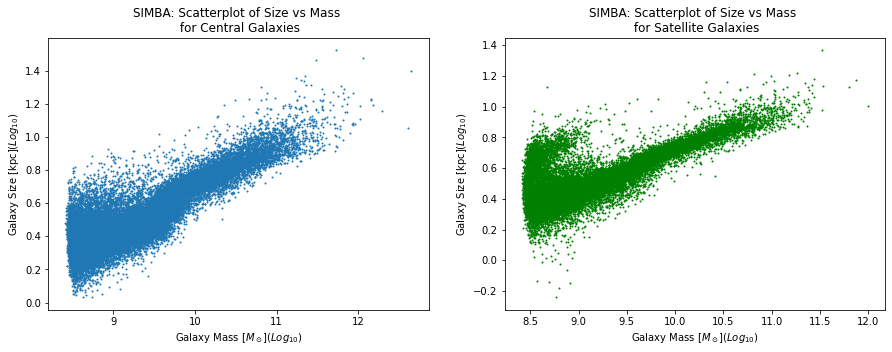

In [103]:
fig3,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.plot(central_galaxies_mass, central_galaxies_size, '.', markersize=2)
ax1.set_title('SIMBA: Scatterplot of Size vs Mass \n for Central Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')

ax2.plot(satellite_galaxies_mass, satellite_galaxies_size, '.', markersize=2, color='g')
ax2.set_title('SIMBA: Scatterplot of Size vs Mass \n for Satellite Galaxies')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.show()

#plt.savefig("TNG501_central_satellite_scatterplot.jpeg", dpi=500)

In [104]:
def plot_df_mass_size_sfr(df, galaxy_type = 'central'):
    
    sub_df = df.loc[df["galaxy_type"] == galaxy_type, ["galaxy_mass_log","galaxy_size_log", 'SFR']]
    plt.scatter(sub_df["galaxy_mass_log"], sub_df["galaxy_size_log"], c = np.log10(sub_df['SFR']+0.01), 
                s=30, marker='o', label='Star Formation Rate [$M_\odot / yr$] \n mass-size correlation=0.66')
    plt.xlabel('Total Mass [$M_\odot$]')
    plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
    plt.legend(shadow = True)
    plt.colorbar()
    plt.show()

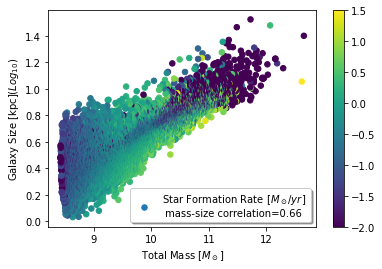

In [106]:
plot_df_mass_size_sfr(df_SIMBA_mass_filtered, galaxy_type= 'central')

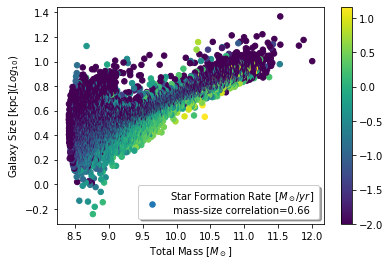

In [105]:
plot_df_mass_size_sfr(df_SIMBA_mass_filtered, galaxy_type= 'satellite')

### Size vs Mass plot

#### 1D Histograms

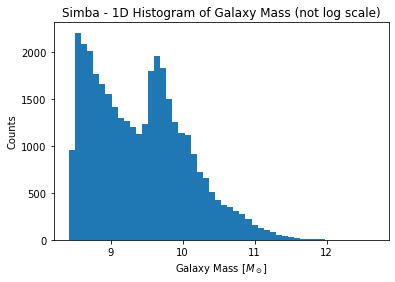

In [111]:
plt.hist(central_galaxies_mass,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Mass (not log scale)')
#plt.xscale('log')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Simba_GalaxyStellarMass_Hist1D_nonlog.jpeg", dpi=500)
plt.show()

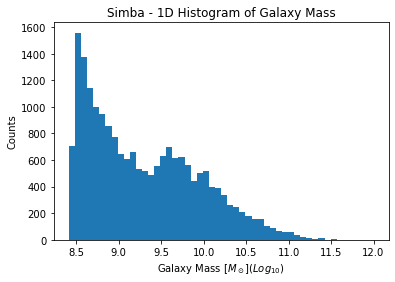

In [110]:
plt.hist(satellite_galaxies_mass,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Mass')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("Simba_GalaxyStellarMass_Hist1D.jpeg", dpi=500)
plt.show()

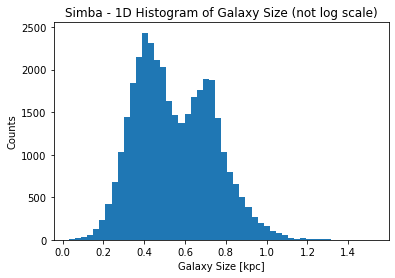

In [112]:
plt.hist(central_galaxies_size,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Size (not log scale)')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]')
#plt.savefig("Simba_GalaxySize_Hist1D_nonlog.jpeg", dpi=500)
plt.show()

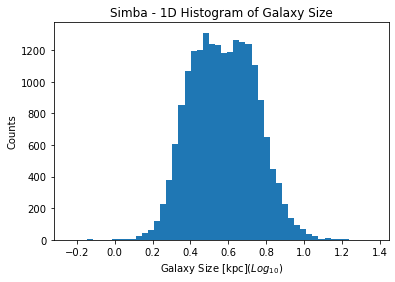

In [113]:
plt.hist(satellite_galaxies_size,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Size')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]($ Log_{10} $)')
#plt.savefig("Simba_GalaxySize_Hist1D.jpeg", dpi=500)
plt.show()

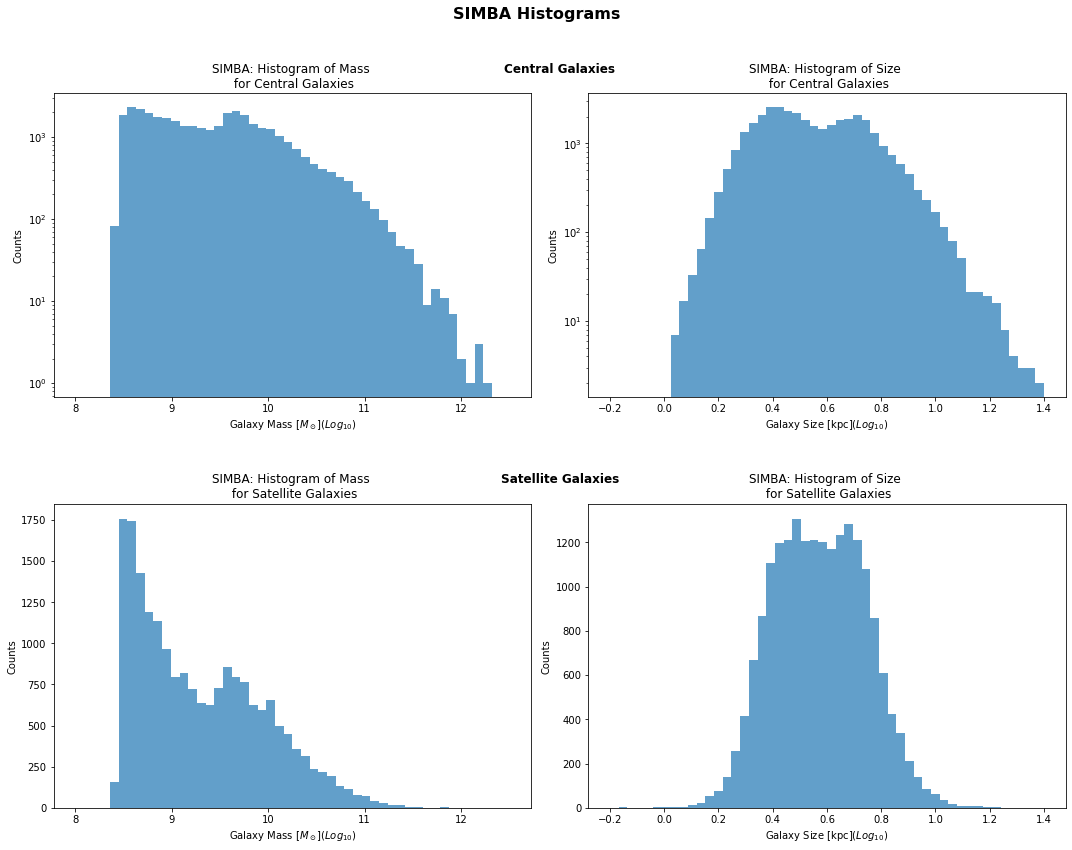

In [157]:
fig,[(ax1, ax2), (ax3, ax4)]=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
fig.suptitle('SIMBA Histograms', fontsize=16, fontweight='bold')

ax1.hist(central_galaxies_mass, bins=50, log=True, alpha=0.7, range=(8.0, 12.5))
#ax1.hist(central_galaxies_mass_TNG100, bins=50, log=True, alpha=0.5, label='TNG100')
ax1.set_title('SIMBA: Histogram of Mass \n for Central Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Counts')
#ax1.legend(loc='upper right')

ax2.hist(central_galaxies_size,bins=50, log=True, alpha=0.7, range=(-0.2, 1.4))
#ax2.hist(central_galaxies_size_TNG100, bins=50, log=True, alpha=0.5, label='TNG100')
ax2.set_title('SIMBA: Histogram of Size \n for Central Galaxies')
ax2.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.set_ylabel('Counts')
#ax2.legend(loc='upper right')

ax3.hist(satellite_galaxies_mass, bins=50, alpha=0.7, range=(8.0, 12.5))
#ax3.hist(satellite_galaxies_mass_TNG100, bins=50, alpha=0.5, label='TNG100')
ax3.set_title('SIMBA: Histogram of Mass \n for Satellite Galaxies')
ax3.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax3.set_ylabel('Counts')
#ax3.legend(loc='upper right')

ax4.hist(satellite_galaxies_size, bins=50, alpha=0.7, range=(-0.2, 1.4))
#ax4.hist(satellite_galaxies_size_TNG100, bins=50, alpha=0.5, label='TNG100')
ax4.set_title('SIMBA: Histogram of Size \n for Satellite Galaxies')
ax4.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax4.set_ylabel('Counts')
#ax4.legend(loc='upper right')

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
grid = plt.GridSpec(2, 2)
create_subtitle(fig, grid[0, ::], 'Central Galaxies')
create_subtitle(fig, grid[1, ::], 'Satellite Galaxies')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
#plt.savefig("SIMBA_central_satellites_Hist1D.jpeg", dpi=500)
plt.show()

In [119]:
pwd

'/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar'

#### 2D Histogram

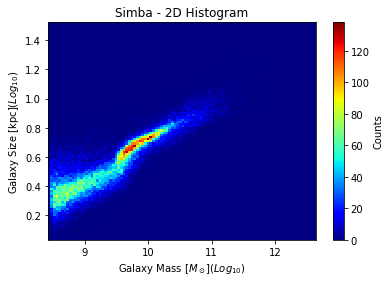

In [114]:
# Figure using the Matplotlib hist2d

plt.hist2d(central_galaxies_mass, central_galaxies_size, cmap = plt.cm.jet, bins=100)
plt.title('Simba - 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("Simba_GalaxyStellarMass_vs_Size_v1.jpeg", dpi=500)
plt.show()

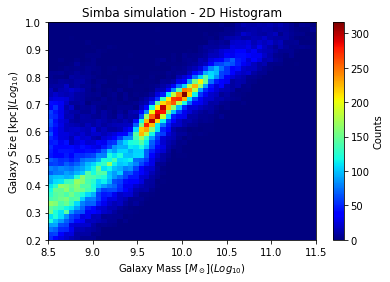

In [38]:
# Figure using the Matplotlib hist2d where histogram range is defined

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=50,  range=[[8.5,11.5],[0.2,1.0]]  )
plt.title('Simba simulation - 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
plt.savefig("GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v2.jpeg", dpi=500)
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("Simba_GalaxyStellarMass_vs_Size_Hist2D_v1.jpeg", dpi=500)
plt.show()

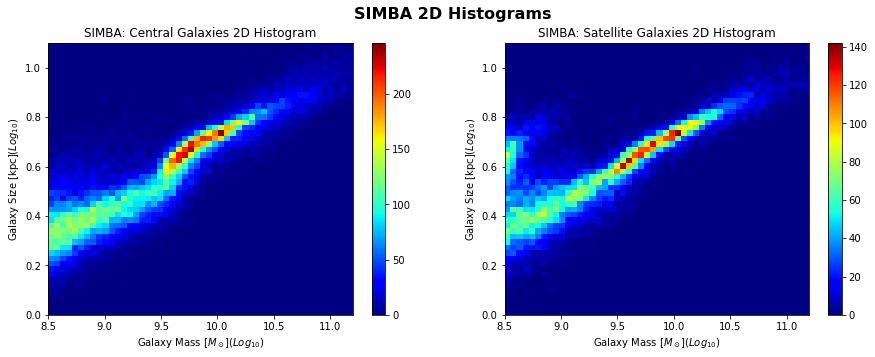

In [123]:
# Figure using the Matplotlib hist2d
import matplotlib.cm as cm
import matplotlib.colors as norm

fig3,[ax1, ax2] =plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig3.suptitle('SIMBA 2D Histograms', fontsize=16, fontweight='bold')

im1 = ax1.hist2d(central_galaxies_mass, central_galaxies_size, cmap = plt.cm.jet, bins=50, 
                 range=[[8.5,11.2],[0.0,1.1]])
ax1.set_title('SIMBA: Central Galaxies 2D Histogram')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
fig3.colorbar(im1[3], ax=ax1)

im2 = ax2.hist2d(satellite_galaxies_mass, satellite_galaxies_size, cmap = plt.cm.jet, bins=50,
                range=[[8.5,11.2],[0.0,1.1]])
ax2.set_title('SIMBA: Satellite Galaxies 2D Histogram')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
fig3.colorbar(im2[3], ax=ax2)

# im3 = ax3.hist2d(central_galaxies_mass_TNG100, central_galaxies_size_TNG100, cmap = plt.cm.jet, bins=50, range=[[8,11.3],[-0.5,1.2]])
# ax3.set_title('TNG100-1: Central Galaxies 2D Histogram')
# ax3.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax3.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# fig3.colorbar(im1[3], ax=ax3)

# im4 = ax4.hist2d(satellite_galaxies_mass_TNG100, satellite_galaxies_size_TNG100, cmap = plt.cm.jet, bins=50, range=[[8,10.0],[-1.2,1.0]])
# ax4.set_title('TNG100-1: Satellite Galaxies 2D Histogram')
# ax4.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax4.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# fig3.colorbar(im2[3], ax=ax4)

# def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
#     "Sign sets of subplots with title"
#     row = fig.add_subplot(grid)
#     # the '\n' is important
#     row.set_title(f'{title}\n', fontweight='semibold')
#     # hide subplot
#     row.set_frame_on(False)
#     row.axis('off')
    
# grid3 = plt.GridSpec(2, 2)
# create_subtitle(fig3, grid3[0, ::], 'TNG50-1 Galaxies')
# create_subtitle(fig3, grid3[1, ::], 'TNG100-1 Galaxies')
# fig3.tight_layout()
# fig3.subplots_adjust(top=0.88)

#plt.savefig("SIMBA_central_satellite_Hist2D.jpeg", dpi=500)
plt.show()



## Size vs Mass, and SFR

#### <font color='blue'> Spearman correlations 

In [124]:
mass_size_corr_central = stats.spearmanr(central_galaxies_mass, central_galaxies_size )
SFR_size_corr_central = stats.spearmanr(central_galaxies_SFR, central_galaxies_size )
SFR_mass_corr_central = stats.spearmanr(central_galaxies_SFR, central_galaxies_mass )

mass_size_corr_satellite = stats.spearmanr(satellite_galaxies_mass, satellite_galaxies_size )
SFR_size_corr_satellite = stats.spearmanr(satellite_galaxies_SFR, satellite_galaxies_size )
SFR_mass_corr_satellite = stats.spearmanr(satellite_galaxies_SFR, satellite_galaxies_mass )

In [127]:
print('mass_size_corr_central_SIMBA', mass_size_corr_central)
print('SFR_size_corr_central_SIMBA', SFR_size_corr_central)
print('SFR_mass_corr_central_SIMBA', SFR_mass_corr_central)

mass_size_corr_central_SIMBA SpearmanrResult(correlation=0.8672220737345897, pvalue=0.0)
SFR_size_corr_central_SIMBA SpearmanrResult(correlation=-0.007723074297837443, pvalue=0.14370768227023273)
SFR_mass_corr_central_SIMBA SpearmanrResult(correlation=0.2073014696236607, pvalue=0.0)


In [128]:
print('mass_size_corr_satellite_SIMBA', mass_size_corr_satellite)
print('SFR_size_corr_satellite_SIMBA', SFR_size_corr_satellite)
print('SFR_mass_corr_satellite_SIMBA', SFR_mass_corr_satellite)

mass_size_corr_satellite_SIMBA SpearmanrResult(correlation=0.6783101563976326, pvalue=0.0)
SFR_size_corr_satellite_SIMBA SpearmanrResult(correlation=-0.2292645495340513, pvalue=4.647369733163973e-234)
SFR_mass_corr_satellite_SIMBA SpearmanrResult(correlation=0.1505372498972024, pvalue=1.586101733652994e-100)


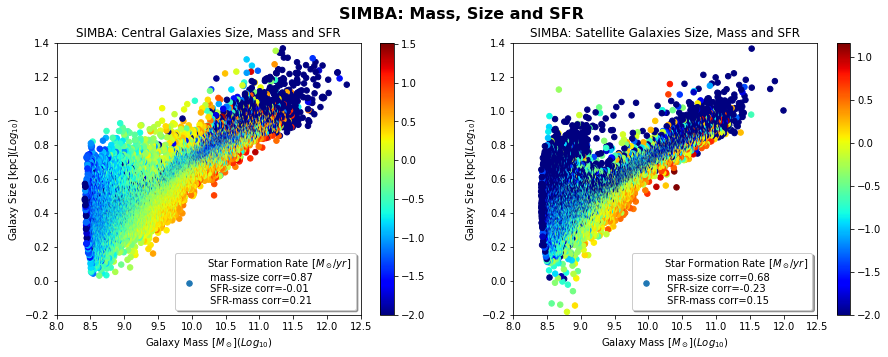

In [154]:
import matplotlib.cm as cm
import matplotlib.colors as norm

fig4,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig4.suptitle('SIMBA: Mass, Size and SFR', fontsize=16, fontweight='bold')

im1 = ax1.scatter(central_galaxies_mass, central_galaxies_size, 
                  c = np.log10(central_galaxies_SFR + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='Star Formation Rate [$M_\odot / yr$] \n mass-size corr=0.87 \n SFR-size corr=-0.01 \n SFR-mass corr=0.21')
ax1.set_xlim([8.0, 12.5])
ax1.set_ylim([-0.2, 1.4])
ax1.set_title('SIMBA: Central Galaxies Size, Mass and SFR')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax1.legend(loc='lower right', shadow=True)
fig4.colorbar(im1, ax=ax1)

im2 = ax2.scatter(satellite_galaxies_mass, satellite_galaxies_size, 
                  c = np.log10(satellite_galaxies_SFR + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='Star Formation Rate [$M_\odot / yr$] \n mass-size corr=0.68 \n SFR-size corr=-0.23 \n SFR-mass corr=0.15')
ax2.set_xlim([8.0, 12.5])
ax2.set_ylim([-0.2, 1.4])
ax2.set_title('SIMBA: Satellite Galaxies Size, Mass and SFR')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.legend(loc='lower right' , shadow=True)
fig4.colorbar(im2, ax=ax2)

# im3 = ax3.scatter(central_galaxies_mass_TNG100, central_galaxies_size_TNG100, 
#                   c = np.log10(central_galaxies_SFR_TNG100 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
#                   label='Star Formation Rate [$M_\odot / yr$] \n mass-size corr=0.23 \n SFR-size corr=0.01 \n SFR-mass corr=0.45')
# ax3.set_title('TNG100-1: Central Galaxies Size, Mass and SFR')
# ax3.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax3.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# ax3.legend( loc='lower right', shadow=True)
# fig4.colorbar(im3, ax=ax3)

# im4 = ax4.scatter(satellite_galaxies_mass_TNG100, satellite_galaxies_size_TNG100, 
#                   c = np.log10(satellite_galaxies_SFR_TNG100 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
#                   label='Star Formation Rate [$M_\odot / yr$] \n mass-size corr=-0.72 \n SFR-size corr=0.25 \n SFR-mass corr=0.08')
# ax4.set_title('TNG100-1: Satellite Galaxies Size, Mass and SFR')
# ax4.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax4.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# ax4.legend(loc='lower right', shadow=True)
# fig4.colorbar(im4, ax=ax4)

# def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
#     "Sign sets of subplots with title"
#     row = fig.add_subplot(grid)
#     # the '\n' is important
#     row.set_title(f'{title}\n', fontweight='semibold')
#     # hide subplot
#     row.set_frame_on(False)
#     row.axis('off')
    
# grid4 = plt.GridSpec(2, 2)
# create_subtitle(fig4, grid4[0, ::], 'TNG50-1 Galaxies')
# create_subtitle(fig4, grid4[1, ::], 'TNG100-1 Galaxies')
# fig4.tight_layout()
# fig4.subplots_adjust(top=0.88)

#plt.savefig("SIMBA_central_satellite_SFR.jpeg", dpi=500)
plt.show()

## Size vs Mass, and Hydrogen

#### <font color='blue'> Spearman correlations 

In [140]:
mass_size_corr_central = stats.spearmanr(central_galaxies_mass, central_galaxies_size )
mHI_size_corr_central = stats.spearmanr(central_galaxies_mHI, central_galaxies_size )
mHI_mass_corr_central = stats.spearmanr(central_galaxies_mHI, central_galaxies_mass )
SFR_mHI_corr_central = stats.spearmanr(central_galaxies_SFR, central_galaxies_mHI )


mass_size_corr_satellite = stats.spearmanr(satellite_galaxies_mass, satellite_galaxies_size )
mHI_size_corr_satellite = stats.spearmanr(satellite_galaxies_mHI, satellite_galaxies_size )
mHI_mass_corr_satellite = stats.spearmanr(satellite_galaxies_mHI, satellite_galaxies_mass )
SFR_mHI_corr_satellite = stats.spearmanr(satellite_galaxies_SFR, satellite_galaxies_mHI )

In [141]:
print('mass_size_corr_central_SIMBA', mass_size_corr_central)
print('mHI_size_corr_central_SIMBA', mHI_size_corr_central)
print('mHI_mass_corr_central_SIMBA', mHI_mass_corr_central)
print('SFR_mHI_corr_central_SIMBA', SFR_mHI_corr_central)

print('mass_size_corr_satellite_SIMBA', mass_size_corr_satellite)
print('mHI_size_corr_satellite_SIMBA', mHI_size_corr_satellite)
print('mHI_mass_corr_satellite_SIMBA', mHI_mass_corr_satellite)
print('SFR_mHI_corr_satellite_SIMBA', SFR_mHI_corr_satellite)

mass_size_corr_central_SIMBA SpearmanrResult(correlation=0.8672220737345897, pvalue=0.0)
mHI_size_corr_central_SIMBA SpearmanrResult(correlation=0.21399510734245958, pvalue=0.0)
mHI_mass_corr_central_SIMBA SpearmanrResult(correlation=0.2135738279416467, pvalue=0.0)
SFR_mHI_corr_central_SIMBA SpearmanrResult(correlation=0.517483682137154, pvalue=0.0)
mass_size_corr_satellite_SIMBA SpearmanrResult(correlation=0.6783101563976326, pvalue=0.0)
mHI_size_corr_satellite_SIMBA SpearmanrResult(correlation=-0.0940816398141908, pvalue=4.18412314869338e-40)
mHI_mass_corr_satellite_SIMBA SpearmanrResult(correlation=0.30725649972724534, pvalue=0.0)
SFR_mHI_corr_satellite_SIMBA SpearmanrResult(correlation=0.8218350019810339, pvalue=0.0)


In [142]:
mass_size_corr_central = stats.spearmanr(central_galaxies_mass, central_galaxies_size )
mH2_size_corr_central = stats.spearmanr(central_galaxies_mH2, central_galaxies_size )
mH2_mass_corr_central = stats.spearmanr(central_galaxies_mH2, central_galaxies_mass )
SFR_mH2_corr_central = stats.spearmanr(central_galaxies_SFR, central_galaxies_mH2 )

mass_size_corr_satellite = stats.spearmanr(satellite_galaxies_mass, satellite_galaxies_size )
mH2_size_corr_satellite = stats.spearmanr(satellite_galaxies_mH2, satellite_galaxies_size )
mH2_mass_corr_satellite = stats.spearmanr(satellite_galaxies_mH2, satellite_galaxies_mass )
SFR_mH2_corr_satellite = stats.spearmanr(satellite_galaxies_SFR, satellite_galaxies_mH2 )

In [143]:
print('mass_size_corr_central_SIMBA', mass_size_corr_central)
print('mH2_size_corr_central_SIMBA', mH2_size_corr_central)
print('mH2_mass_corr_central_SIMBA', mH2_mass_corr_central)
print('SFR_mH2_corr_central_SIMBA', SFR_mH2_corr_central)

print('mass_size_corr_satellite_SIMBA', mass_size_corr_satellite)
print('mH2_size_corr_satellite_SIMBA', mH2_size_corr_satellite)
print('mH2_mass_corr_satellite_SIMBA', mH2_mass_corr_satellite)
print('SFR_mH2_corr_satellite_SIMBA', SFR_mH2_corr_satellite)

mass_size_corr_central_SIMBA SpearmanrResult(correlation=0.8672220737345897, pvalue=0.0)
mH2_size_corr_central_SIMBA SpearmanrResult(correlation=0.2502467894282382, pvalue=0.0)
mH2_mass_corr_central_SIMBA SpearmanrResult(correlation=0.40901990982635444, pvalue=0.0)
SFR_mH2_corr_central_SIMBA SpearmanrResult(correlation=0.895468887297053, pvalue=0.0)
mass_size_corr_satellite_SIMBA SpearmanrResult(correlation=0.6783101563976326, pvalue=0.0)
mH2_size_corr_satellite_SIMBA SpearmanrResult(correlation=-0.12909920897071636, pvalue=3.243212089070952e-74)
mH2_mass_corr_satellite_SIMBA SpearmanrResult(correlation=0.2375363543004763, pvalue=1.3343595695545986e-251)
SFR_mH2_corr_satellite_SIMBA SpearmanrResult(correlation=0.9706882711193066, pvalue=0.0)


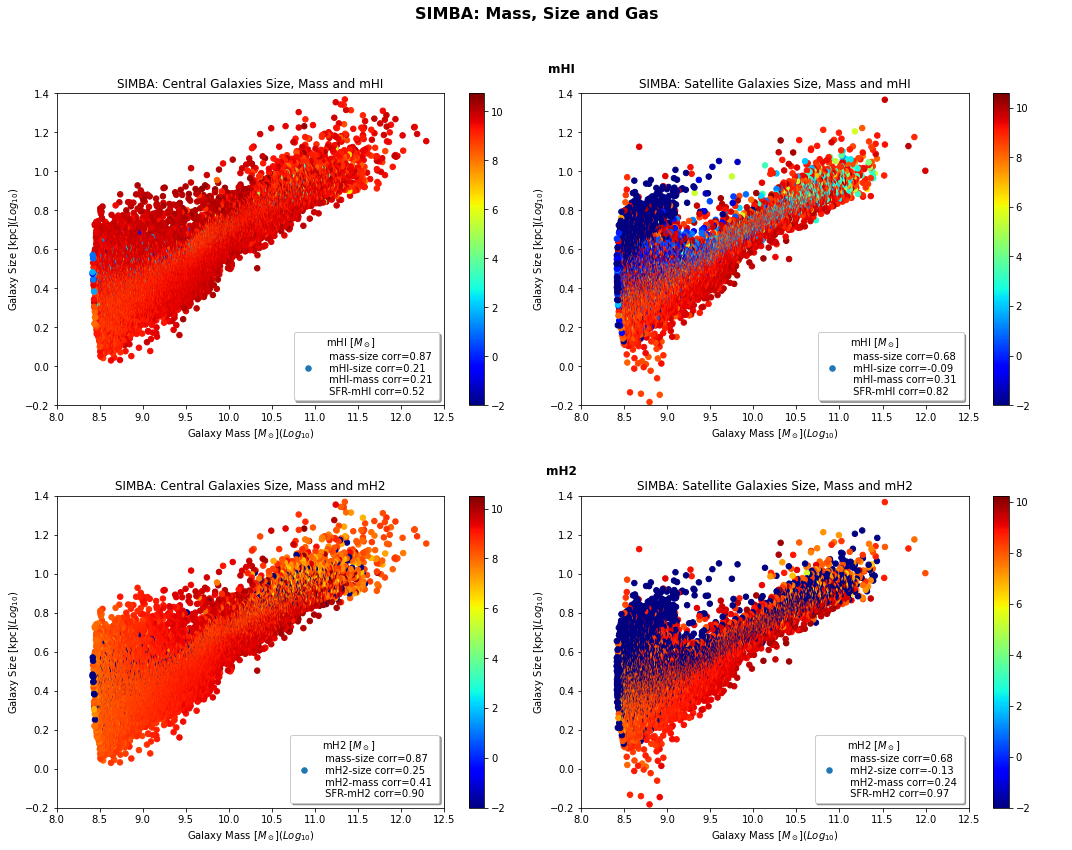

In [151]:
import matplotlib.cm as cm
import matplotlib.colors as norm

fig2,[(ax1, ax2), (ax3, ax4)]=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
fig2.suptitle('SIMBA: Mass, Size and Gas', fontsize=16, fontweight='bold')

im1 = ax1.scatter(central_galaxies_mass, central_galaxies_size, 
                  c = np.log10(central_galaxies_mHI + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='mHI [$M_\odot $] \n mass-size corr=0.87 \n mHI-size corr=0.21 \n mHI-mass corr=0.21 \n SFR-mHI corr=0.52')
ax1.set_xlim([8.0, 12.5])
ax1.set_ylim([-0.2, 1.4])
ax1.set_title('SIMBA: Central Galaxies Size, Mass and mHI')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax1.legend(loc='lower right', shadow=True)
fig2.colorbar(im1, ax=ax1)

im2 = ax2.scatter(satellite_galaxies_mass, satellite_galaxies_size, 
                  c = np.log10(satellite_galaxies_mHI + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='mHI [$M_\odot $] \n mass-size corr=0.68 \n mHI-size corr=-0.09 \n mHI-mass corr=0.31 \n SFR-mHI corr=0.82')
ax2.set_xlim([8.0, 12.5])
ax2.set_ylim([-0.2, 1.4])
ax2.set_title('SIMBA: Satellite Galaxies Size, Mass and mHI')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.legend(loc='lower right' , shadow=True)
fig2.colorbar(im2, ax=ax2)

im3 = ax3.scatter(central_galaxies_mass, central_galaxies_size, 
                  c = np.log10(central_galaxies_mH2 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='mH2 [$M_\odot $] \n mass-size corr=0.87 \n mH2-size corr=0.25 \n mH2-mass corr=0.41 \n SFR-mH2 corr=0.90')
ax3.set_xlim([8.0, 12.5])
ax3.set_ylim([-0.2, 1.4])
ax3.set_title('SIMBA: Central Galaxies Size, Mass and mH2')
ax3.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax3.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax3.legend( loc='lower right', shadow=True)
fig2.colorbar(im3, ax=ax3)

im4 = ax4.scatter(satellite_galaxies_mass, satellite_galaxies_size, 
                  c = np.log10(satellite_galaxies_mH2 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
                  label='mH2 [$M_\odot $] \n mass-size corr=0.68 \n mH2-size corr=-0.13 \n mH2-mass corr=0.24 \n SFR-mH2 corr=0.97')
ax4.set_xlim([8.0, 12.5])
ax4.set_ylim([-0.2, 1.4])
ax4.set_title('SIMBA: Satellite Galaxies Size, Mass and mH2')
ax4.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax4.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax4.legend(loc='lower right', shadow=True)
fig2.colorbar(im4, ax=ax4)

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
grid2 = plt.GridSpec(2, 2)
create_subtitle(fig2, grid2[0, ::], 'mHI')
create_subtitle(fig2, grid2[1, ::], 'mH2')
fig2.tight_layout()
fig2.subplots_adjust(top=0.88)

#plt.savefig("SIMBA_central_satellite_Gas.jpeg", dpi=500)
plt.show()

## Size vs Mass, and Halo Mass

#### <font color='blue'> Spearman correlations 

In [164]:
mass_size_corr_central = stats.spearmanr(central_galaxies_mass, central_galaxies_size )
Mhalo_size_corr_central = stats.spearmanr(central_galaxies_Mhalo, central_galaxies_size )
Mhalo_mass_corr_central = stats.spearmanr(central_galaxies_Mhalo, central_galaxies_mass )
SFR_Mhalo_corr_central = stats.spearmanr(central_galaxies_SFR, central_galaxies_Mhalo )


mass_size_corr_satellite = stats.spearmanr(satellite_galaxies_mass, satellite_galaxies_size )
Mhalo_size_corr_satellite = stats.spearmanr(satellite_galaxies_Mhalo, satellite_galaxies_size )
Mhalo_mass_corr_satellite = stats.spearmanr(satellite_galaxies_Mhalo, satellite_galaxies_mass )
SFR_Mhalo_corr_satellite = stats.spearmanr(satellite_galaxies_SFR, satellite_galaxies_Mhalo )

In [165]:
print('mass_size_corr_central_SIMBA', mass_size_corr_central)
print('Mhalo_size_corr_central_SIMBA', Mhalo_size_corr_central)
print('Mhalo_mass_corr_central_SIMBA', Mhalo_mass_corr_central)
print('SFR_Mhalo_corr_central_SIMBA', SFR_Mhalo_corr_central)

print('mass_size_corr_satellite_SIMBA', mass_size_corr_satellite)
print('Mhalo_size_corr_satellite_SIMBA', Mhalo_size_corr_satellite)
print('Mhalo_mass_corr_satellite_SIMBA', Mhalo_mass_corr_satellite)
print('SFR_Mhalo_corr_satellite_SIMBA', SFR_Mhalo_corr_satellite)

mass_size_corr_central_SIMBA SpearmanrResult(correlation=0.8672220737345897, pvalue=0.0)
Mhalo_size_corr_central_SIMBA SpearmanrResult(correlation=0.8305706767042852, pvalue=0.0)
Mhalo_mass_corr_central_SIMBA SpearmanrResult(correlation=0.8803034667681129, pvalue=0.0)
SFR_Mhalo_corr_central_SIMBA SpearmanrResult(correlation=0.18638563569497868, pvalue=1.4980675944992845e-277)
mass_size_corr_satellite_SIMBA SpearmanrResult(correlation=0.6783101563976326, pvalue=0.0)
Mhalo_size_corr_satellite_SIMBA SpearmanrResult(correlation=0.3551272058569932, pvalue=0.0)
Mhalo_mass_corr_satellite_SIMBA SpearmanrResult(correlation=0.09415799943283538, pvalue=3.622565161371603e-40)
SFR_Mhalo_corr_satellite_SIMBA SpearmanrResult(correlation=-0.5815306053770252, pvalue=0.0)


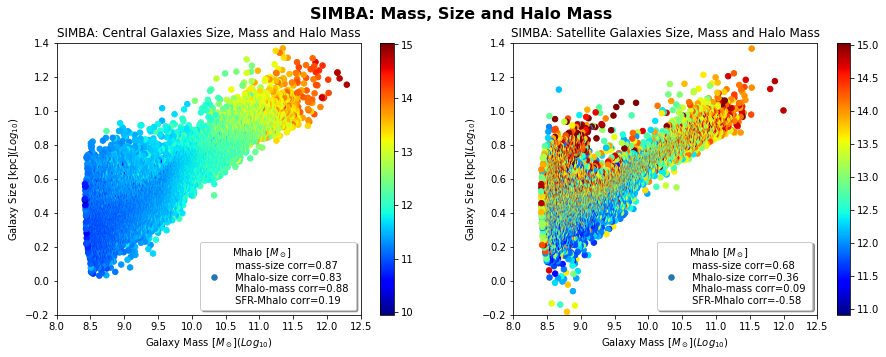

In [174]:
import matplotlib.cm as cm
import matplotlib.colors as norm

fig5,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig5.suptitle('SIMBA: Mass, Size and Halo Mass', fontsize=16, fontweight='bold')

im1 = ax1.scatter(central_galaxies_mass, central_galaxies_size, 
                  c = np.log10(central_galaxies_Mhalo), cmap = plt.cm.jet, s=30, marker='o', 
                  label='Mhalo [$M_\odot $] \n mass-size corr=0.87 \n Mhalo-size corr=0.83 \n Mhalo-mass corr=0.88 \n SFR-Mhalo corr=0.19')
ax1.set_xlim([8.0, 12.5])
ax1.set_ylim([-0.2, 1.4])
ax1.set_title('SIMBA: Central Galaxies Size, Mass and Halo Mass')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax1.legend(loc='lower right', shadow=True)
fig5.colorbar(im1, ax=ax1)

im2 = ax2.scatter(satellite_galaxies_mass, satellite_galaxies_size, 
                  c = np.log10(satellite_galaxies_Mhalo), cmap = plt.cm.jet, s=30, marker='o', 
                  label='Mhalo [$M_\odot $] \n mass-size corr=0.68 \n Mhalo-size corr=0.36 \n Mhalo-mass corr=0.09 \n SFR-Mhalo corr=-0.58')
ax2.set_xlim([8.0, 12.5])
ax2.set_ylim([-0.2, 1.4])
ax2.set_title('SIMBA: Satellite Galaxies Size, Mass and Halo Mass')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.legend(loc='lower right' , shadow=True)
fig5.colorbar(im2, ax=ax2)

# im3 = ax3.scatter(central_galaxies_mass, central_galaxies_size, 
#                   c = np.log10(central_galaxies_mH2 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
#                   label='mH2 [$M_\odot $] \n mass-size corr=0.87 \n mH2-size corr=0.25 \n mH2-mass corr=0.41 \n SFR-mH2 corr=0.90')
# ax3.set_xlim([8.0, 12.5])
# ax3.set_ylim([-0.2, 1.4])
# ax3.set_title('SIMBA: Central Galaxies Size, Mass and mH2')
# ax3.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax3.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# ax3.legend( loc='lower right', shadow=True)
# fig5.colorbar(im3, ax=ax3)

# im4 = ax4.scatter(satellite_galaxies_mass, satellite_galaxies_size, 
#                   c = np.log10(satellite_galaxies_mH2 + 0.01), cmap = plt.cm.jet, s=30, marker='o', 
#                   label='mH2 [$M_\odot $] \n mass-size corr=0.68 \n mH2-size corr=-0.13 \n mH2-mass corr=0.24 \n SFR-mH2 corr=0.97')
# ax4.set_xlim([8.0, 12.5])
# ax4.set_ylim([-0.2, 1.4])
# ax4.set_title('SIMBA: Satellite Galaxies Size, Mass and mH2')
# ax4.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
# ax4.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
# ax4.legend(loc='lower right', shadow=True)
# fig5.colorbar(im4, ax=ax4)

# def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
#     "Sign sets of subplots with title"
#     row = fig.add_subplot(grid)
#     # the '\n' is important
#     row.set_title(f'{title}\n', fontweight='semibold')
#     # hide subplot
#     row.set_frame_on(False)
#     row.axis('off')
    
# grid5 = plt.GridSpec(2, 2)
# create_subtitle(fig5, grid2[0, ::], 'mHI')
# create_subtitle(fig5, grid2[1, ::], 'mH2')
# fig5.tight_layout()
# fig5.subplots_adjust(top=0.88)

#plt.savefig("SIMBA_central_satellite_Halomass.jpeg", dpi=500)
plt.show()

In [169]:
np.log10(min(satellite_galaxies_Mhalo))

10.913933643853658

In [170]:
np.log10(min(central_galaxies_Mhalo)) # how come the minimum of centrals is smaller than that of satellites?

9.951475103255413

In [171]:
np.log10(max(satellite_galaxies_Mhalo))

15.025342958528013

In [172]:
np.log10(max(central_galaxies_Mhalo))

15.025342958528013